In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Load and plot the data

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We will split the set into several parts.
First we split the input values from the corresponding class.
Subsequently we split the dataset into a training set and test set

In [10]:
X = df.iloc[:,1:4]
# Convert the class string into a categorical encoding (e.g. [1, 0, 0] for Iris-setosa)
Y = pd.get_dummies(df.iloc[:,4].values)

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [51]:
Y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


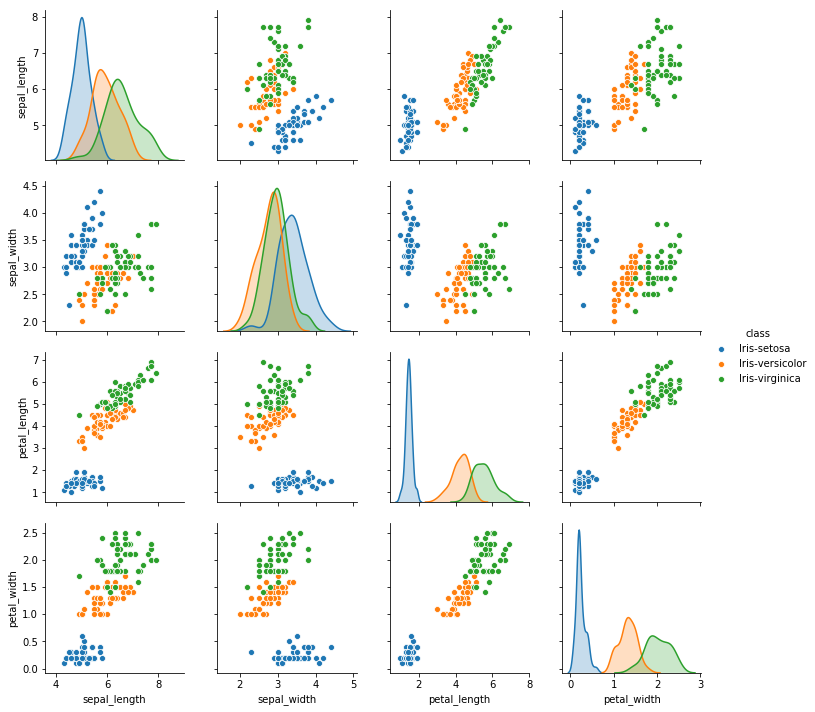

In [11]:
sns.pairplot(df,hue="class")

In [12]:
nr_classes = len(set(y))
input_size = X_train.shape[1]
print('Input size: {}, nr_classes:{}'.format(input_size, nr_classes))

Input size: 3, nr_classes:3


## Define Model

In [38]:
inputs = keras.Input(shape=input_size)
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer) #(inputs)

In [39]:
model = keras.Model(inputs=inputs, outputs=output_layer)

In [40]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


## Train model

In [46]:
lr=0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss=keras.losses.CategoricalCrossentropy())

In [47]:
history = model.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1381
Epoch 3/100
2/2 [==============================] - 0s 742us/step - loss: 0.1383
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1390
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 6/100
2/2 [==============================] - 0s 779us/step - loss: 0.1384
Epoch 7/100
2/2 [==============================] - 0s 774us/step - loss: 0.1379
Epoch 8/100
2/2 [==============================] - 0s 813us/step - loss: 0.1372
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1371
Epoch 10/100
2/2 [==============================] - 0s 955us/step - loss: 0.1371
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1376
Epoch 12/100
2/2 [==============================] - 0s 973us/step - loss: 0.1383
Epoch 13/100
2/2 [==============================]

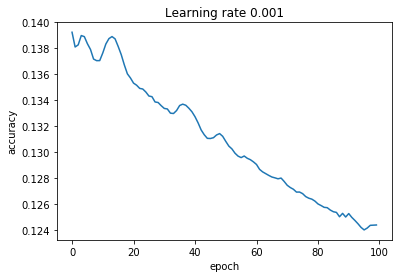

In [48]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Learning rate '+ str(lr))
plt.show()

In [49]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



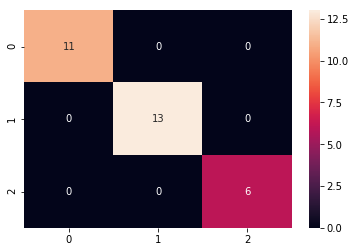

In [50]:
y_test_class = np.argmax(y_test.values,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e Iris-virginica
y_pred_class = np.argmax(y_pred,axis=1) # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. Iris-versicolor

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support

# visualize a confusion matrix in a heat map
cm = confusion_matrix(y_test_class, y_pred_class)
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")